# Feature Selection Analysis - Clean Results

This notebook analyzes the cleaned synthetic experiment results with only essential columns.


DataFrame shape: (24, 20)
Available columns: ['model_name', 'iteration', 'random_seed', 'f1', 'accuracy', 'threshold', 'y_prob', 'y_pred', 'coefficients', 'n_selected', 'hyperparams', 'selected_features', 'scenario', 'scenario_description', 'data_type', 'n_features_total', 'n_true_features', 'true_support', 'beta_true', 'f1_recovery']

Models: ['lasso' 'nimo' 'lassonet']
Scenarios: ['A' 'B' 'C' 'D']
Iterations: [0 1]

First few rows:
  model_name  iteration  random_seed        f1  accuracy  threshold  \
0      lasso          0           42  0.849283    0.8444   0.357659   
1       nimo          0           42  0.842226    0.8356   0.326000   
2   lassonet          0           42  0.864168    0.8652   0.500000   
3      lasso          1         1042  0.879878    0.8744   0.354357   
4       nimo          1         1042  0.891795    0.8908   0.260000   

                                              y_prob  \
0  [0.7943993446680264, 0.26042036118606465, 0.30...   
1                      

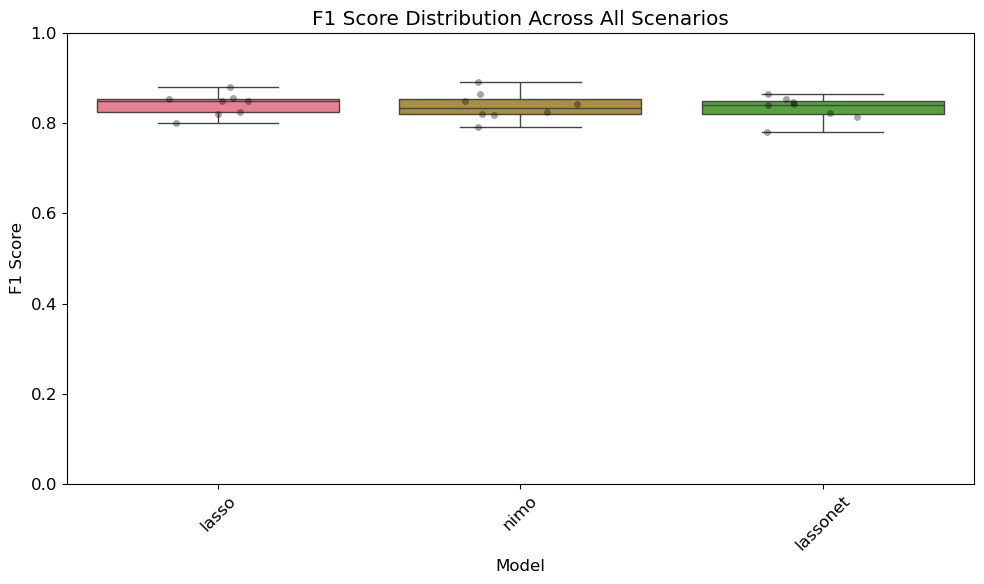

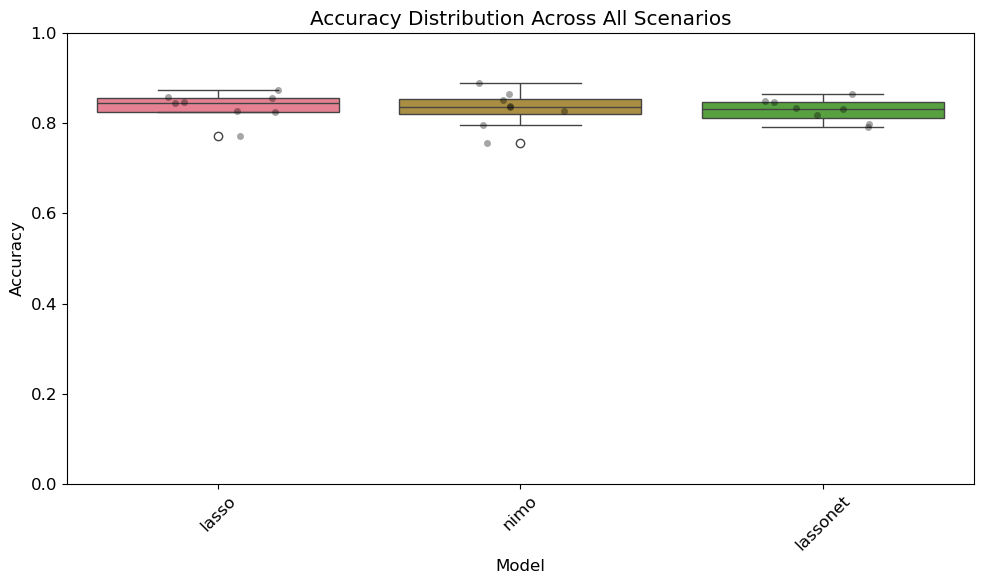

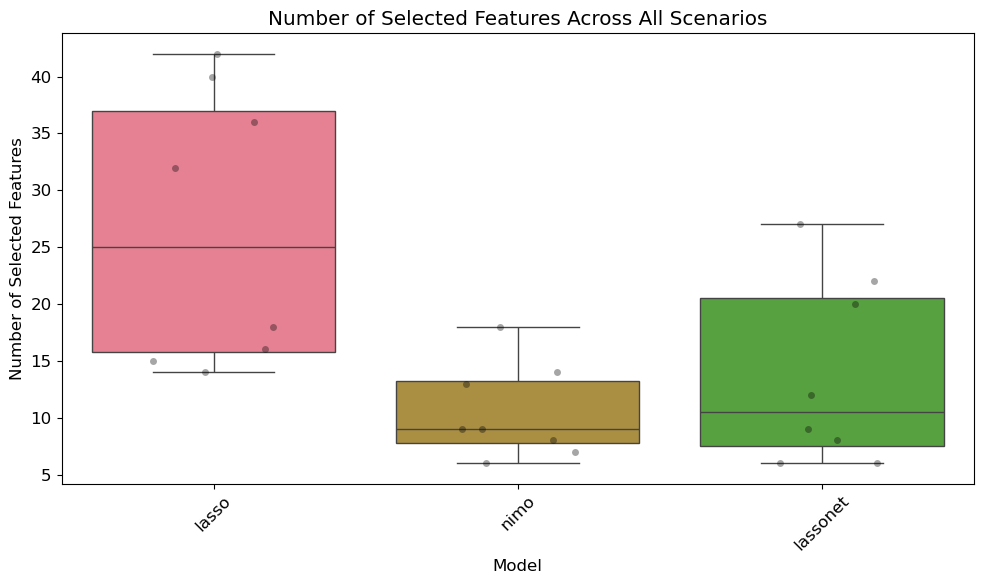

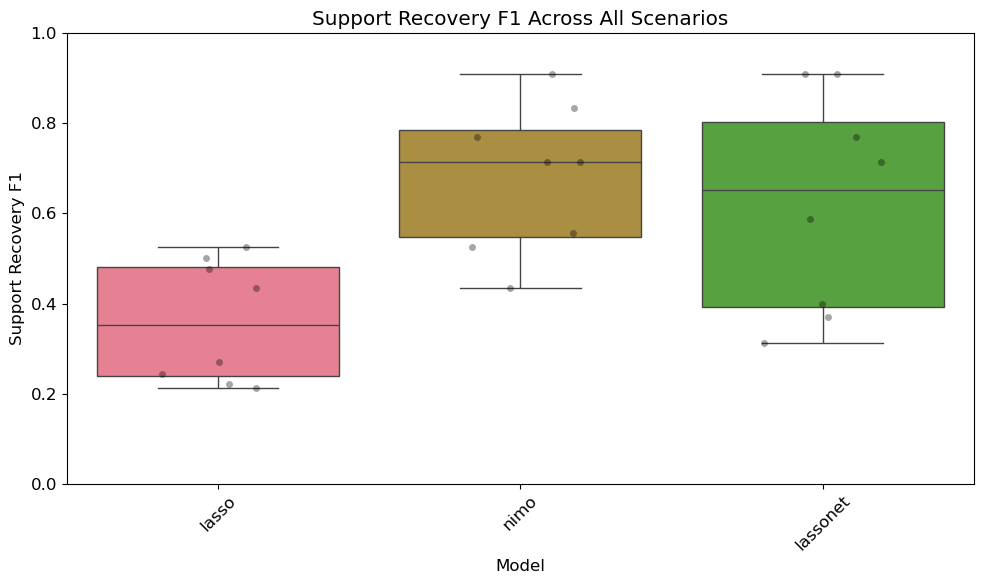

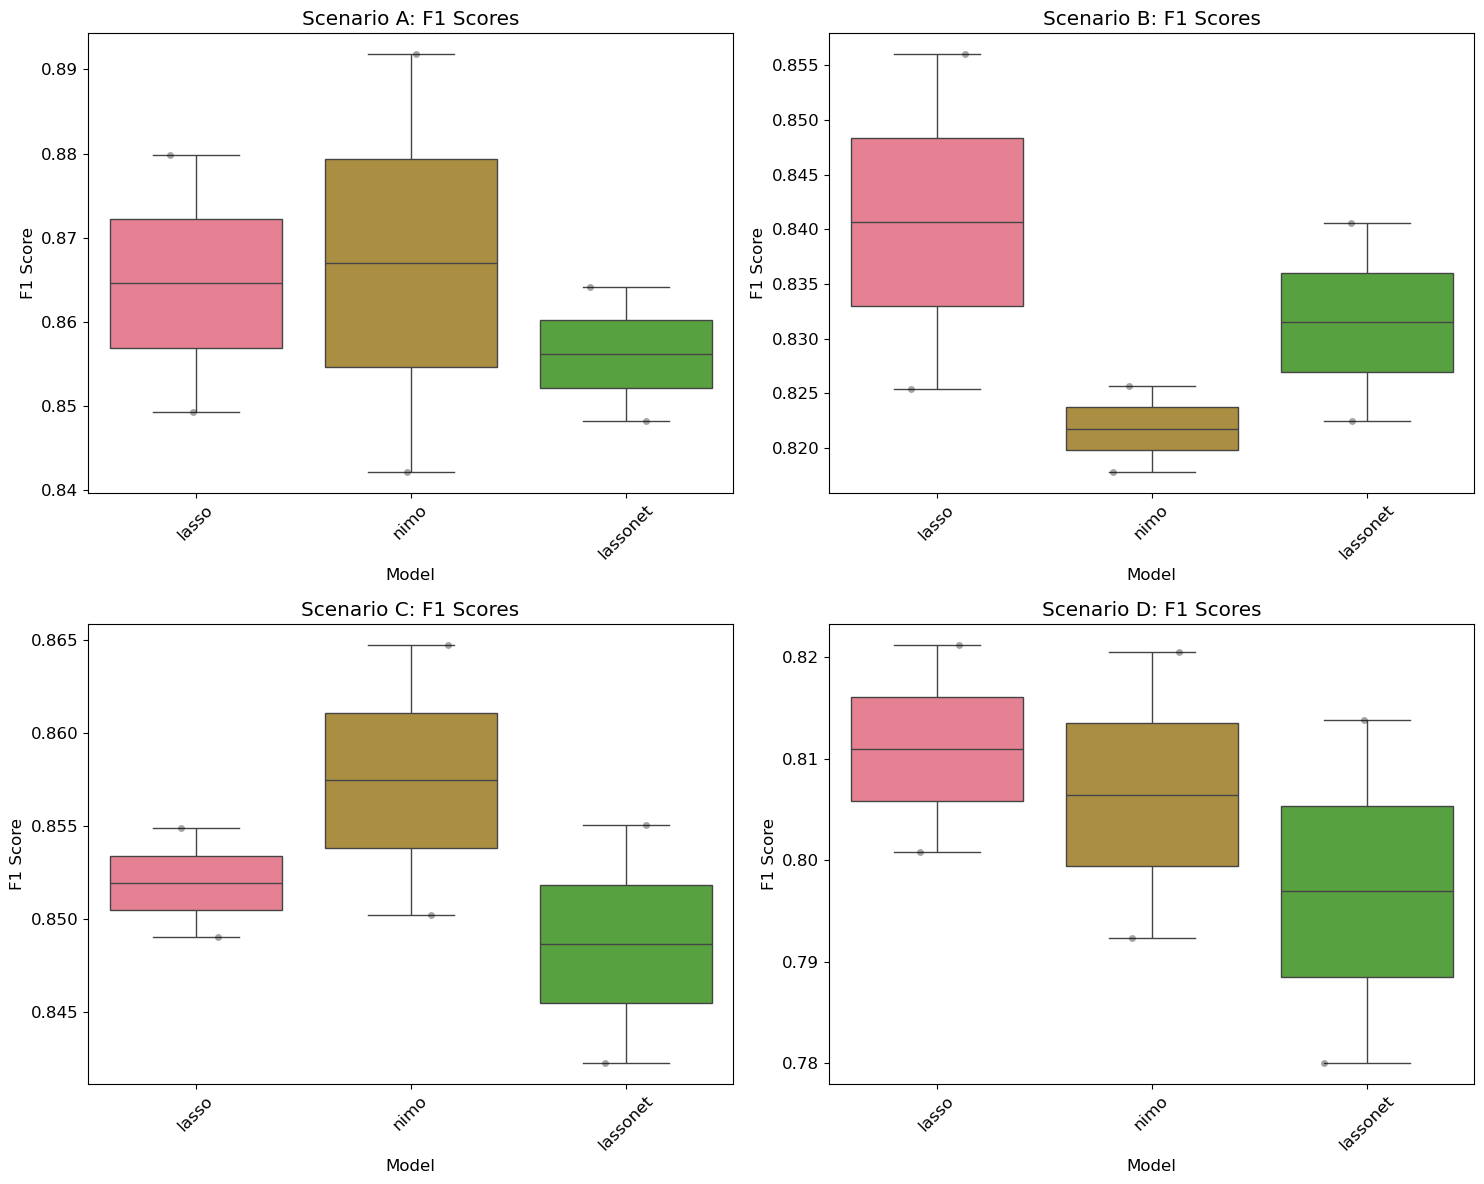

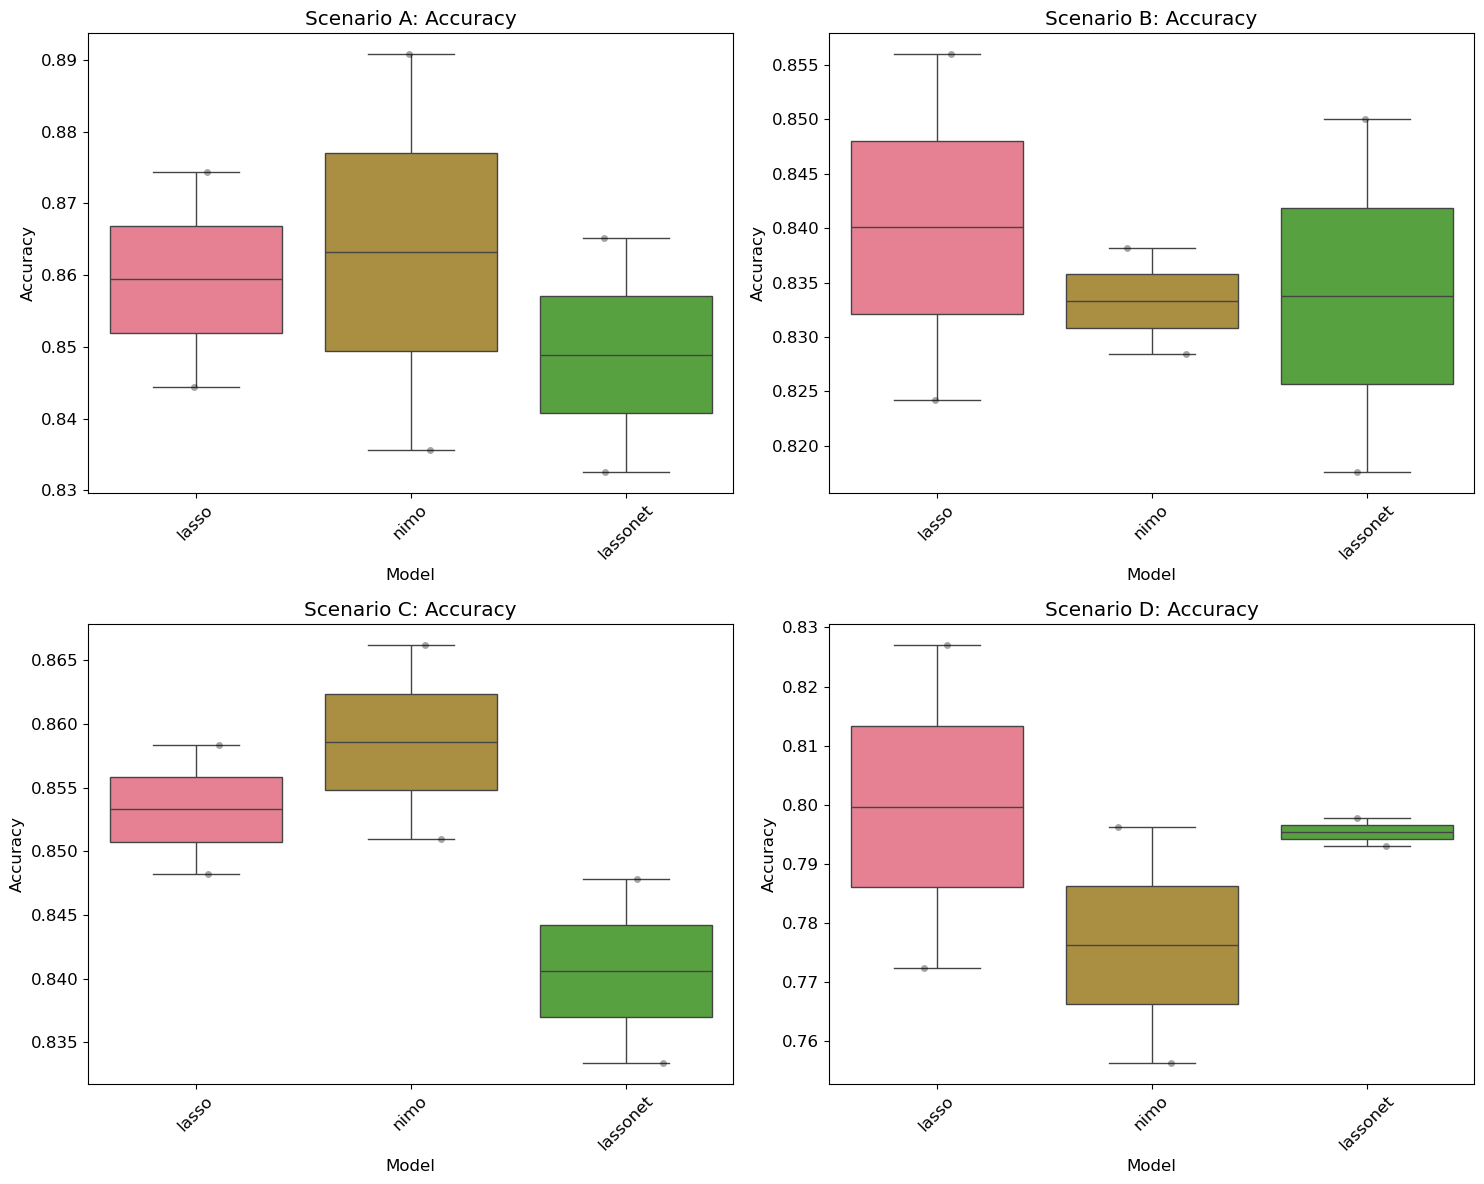

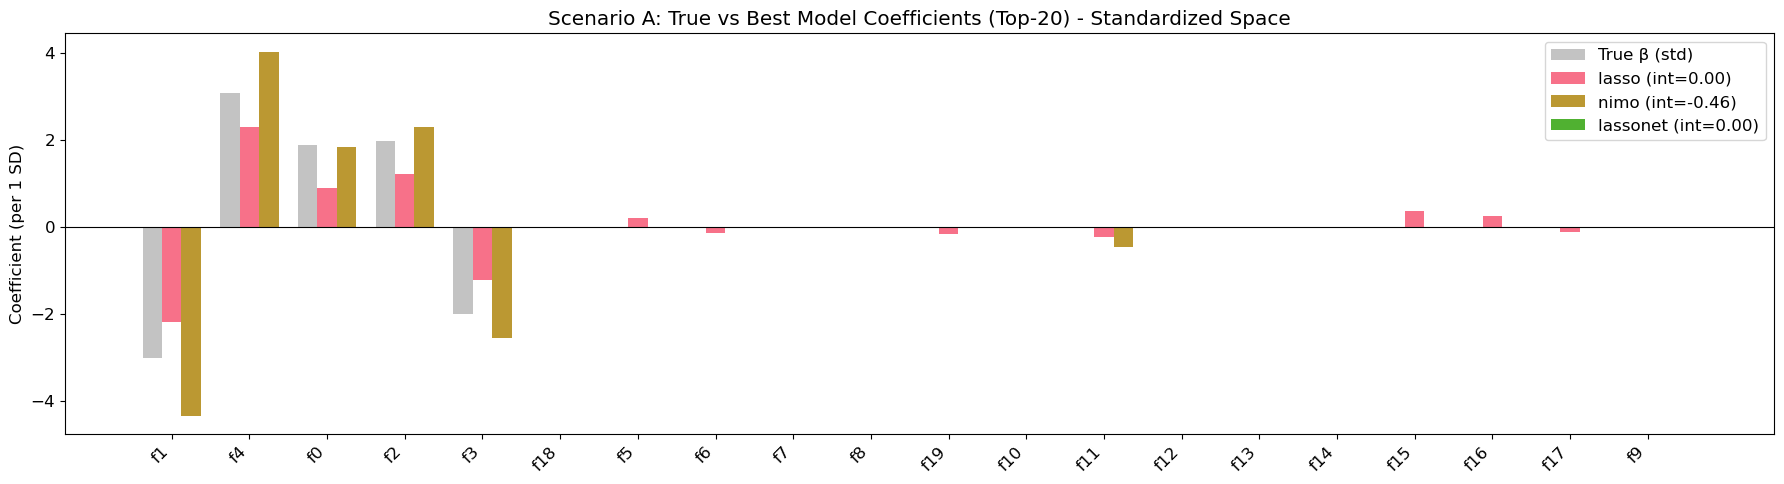


Scenario A Summary:
  lasso: Accuracy=0.8744, F1=0.8799, Intercept=0.0000
  nimo: Accuracy=0.8908, F1=0.8918, Intercept=-0.4583
  lassonet: Accuracy=0.8652, F1=0.8642, Intercept=0.0000



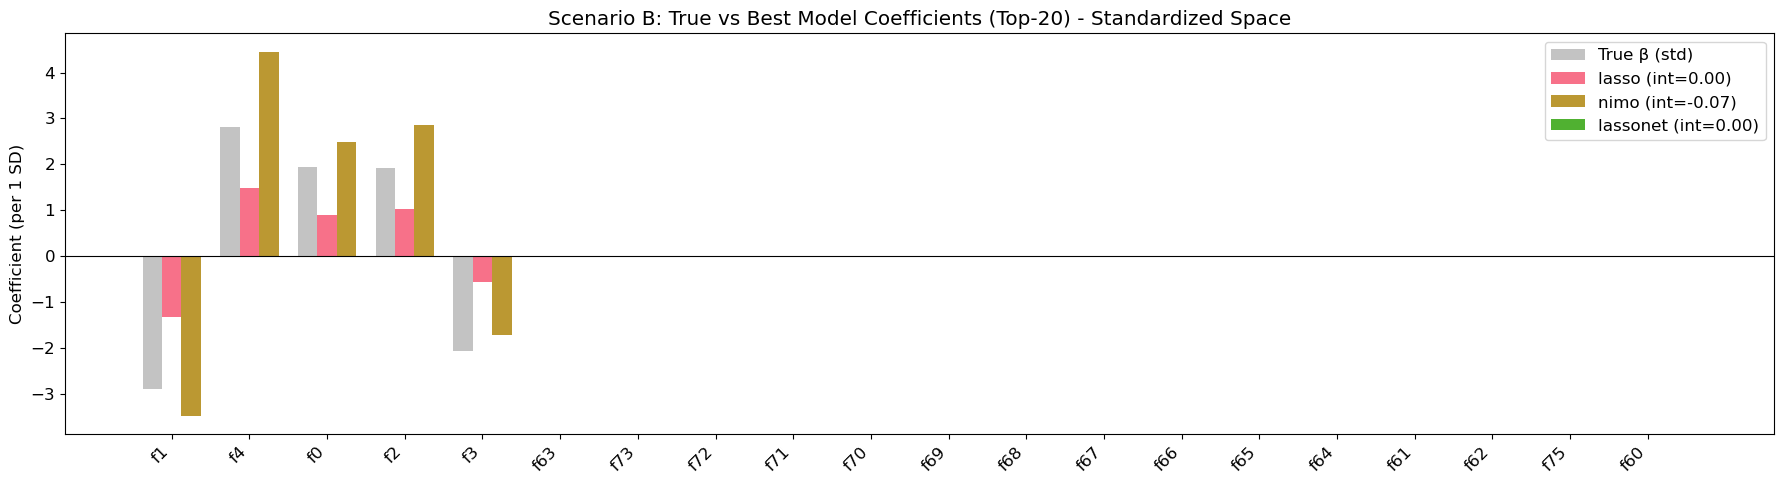


Scenario B Summary:
  lasso: Accuracy=0.8560, F1=0.8560, Intercept=0.0000
  nimo: Accuracy=0.8382, F1=0.8257, Intercept=-0.0713
  lassonet: Accuracy=0.8500, F1=0.8406, Intercept=0.0000



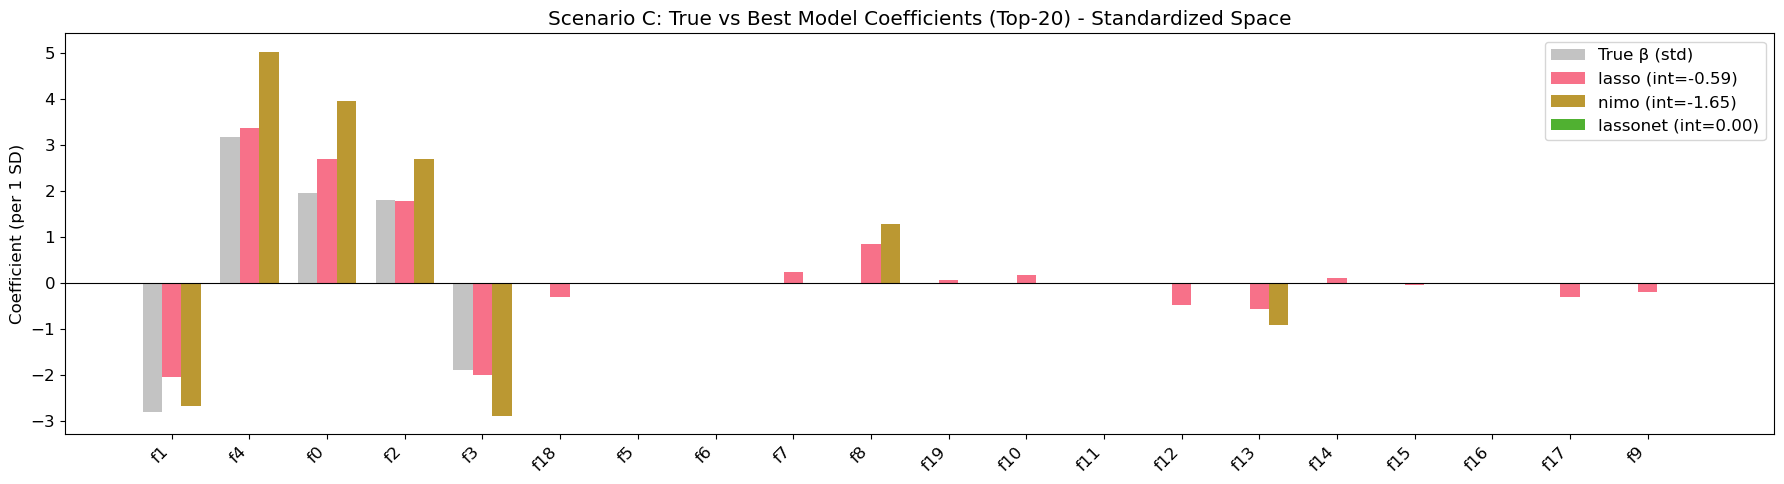


Scenario C Summary:
  lasso: Accuracy=0.8584, F1=0.8549, Intercept=-0.5949
  nimo: Accuracy=0.8662, F1=0.8647, Intercept=-1.6544
  lassonet: Accuracy=0.8478, F1=0.8550, Intercept=0.0000



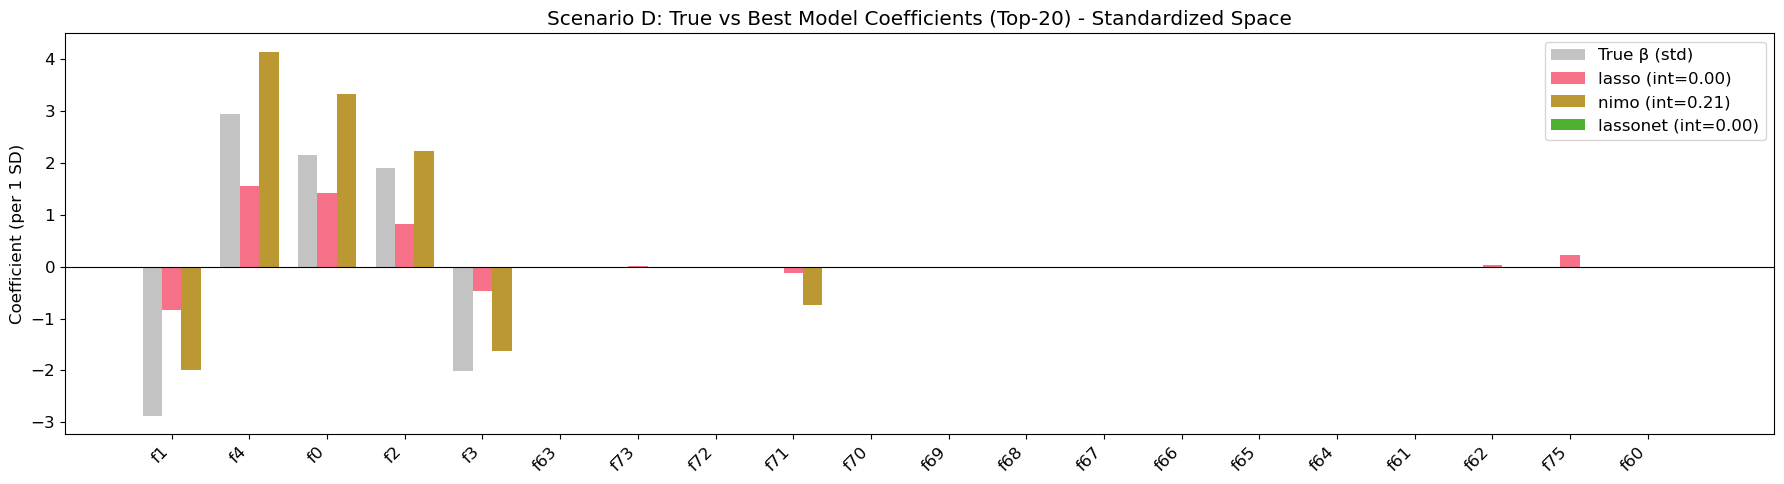


Scenario D Summary:
  lasso: Accuracy=0.8270, F1=0.8212, Intercept=0.0000
  nimo: Accuracy=0.7962, F1=0.8205, Intercept=0.2124
  lassonet: Accuracy=0.7930, F1=0.8138, Intercept=0.0000



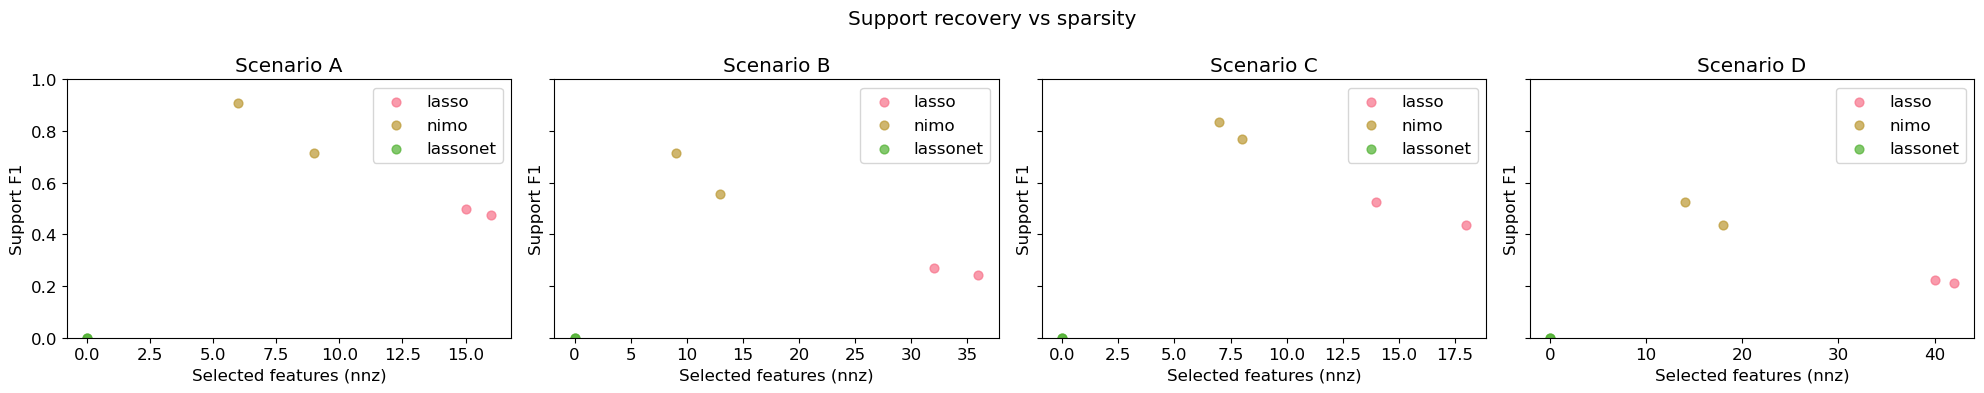

=== OVERALL SUMMARY ===
                f1         accuracy         n_selected          f1_recovery  \
              mean     std     mean     std       mean      std        mean   
model_name                                                                    
lasso       0.8420  0.0248   0.8381  0.0312     26.625  12.0349      0.3608   
lassonet    0.8333  0.0270   0.8297  0.0254     13.750   8.1196      0.6216   
nimo        0.8382  0.0310   0.8328  0.0415     10.500   4.1057      0.6821   

                    
               std  
model_name          
lasso       0.1355  
lassonet    0.2404  
nimo        0.1628  

=== PER-SCENARIO SUMMARY ===

Scenario A:
                f1         accuracy         n_selected         f1_recovery  \
              mean     std     mean     std       mean     std        mean   
model_name                                                                   
lasso       0.8646  0.0216   0.8594  0.0212       15.5  0.7071      0.4881   
lassonet    0.8562  

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from pathlib import Path

# Set style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


# Load the cleaned results
df = pd.read_csv('../results/synthetic/clean_experiment_results.csv')

print(f"DataFrame shape: {df.shape}")
print(f"Available columns: {list(df.columns)}")
print(f"\nModels: {df['model_name'].unique()}")
print(f"Scenarios: {df['scenario'].unique()}")
print(f"Iterations: {df['iteration'].unique()}")

# Display first few rows
print("\nFirst few rows:")
print(df.head())


# Data preparation
df['f1'] = pd.to_numeric(df['f1'], errors='coerce')
df['accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')
df['n_selected'] = pd.to_numeric(df['n_selected'], errors='coerce')
df['f1_recovery'] = pd.to_numeric(df['f1_recovery'], errors='coerce')

# Define models and colors
MODELS = df['model_name'].unique().tolist()
PALETTE = {model: f'C{i}' for i, model in enumerate(MODELS)}

# Scenario order
scenario_order = sorted(df['scenario'].unique())

print(f"Models: {MODELS}")
print(f"Scenarios: {scenario_order}")
print(f"Data shape after cleaning: {df.shape}")

# Analyze each scenario
print("=== SCENARIO ANALYSIS ===")
for scen in scenario_order:
    scen_data = df[df['scenario'] == scen]
    desc = scen_data['scenario_description'].iloc[0]

    # Parse true support and beta
    true_support = json.loads(scen_data['true_support'].iloc[0])
    beta_true = json.loads(scen_data['beta_true'].iloc[0])

    print(f"\nScenario {scen}: {desc}")
    print(f"  True support: {true_support}")
    print(f"  True beta (non-zero): {[beta_true[i] for i in true_support]}")
    print(f"  Beta indices: {true_support}")
    print(f"  Iterations: {len(scen_data)}")

# F1 Score Distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x="model_name", y="f1", hue="model_name", order=MODELS, palette=PALETTE, ax=ax, legend=False)
sns.stripplot(data=df, x="model_name", y="f1", order=MODELS, color="k", alpha=0.35, jitter=0.2, ax=ax)
ax.set_title("F1 Score Distribution Across All Scenarios")
ax.set_xlabel("Model")
ax.set_ylabel("F1 Score")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Accuracy Distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x="model_name", y="accuracy", hue="model_name", order=MODELS, palette=PALETTE, ax=ax, legend=False)
sns.stripplot(data=df, x="model_name", y="accuracy", order=MODELS, color="k", alpha=0.35, jitter=0.2, ax=ax)
ax.set_title("Accuracy Distribution Across All Scenarios")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Selected Features
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x="model_name", y="n_selected", hue="model_name", order=MODELS, palette=PALETTE, ax=ax, legend=False)
sns.stripplot(data=df, x="model_name", y="n_selected", order=MODELS, color="k", alpha=0.35, jitter=0.2, ax=ax)
ax.set_title("Number of Selected Features Across All Scenarios")
ax.set_xlabel("Model")
ax.set_ylabel("Number of Selected Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Support Recovery F1
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x="model_name", y="f1_recovery", hue="model_name", order=MODELS, palette=PALETTE, ax=ax, legend=False)
sns.stripplot(data=df, x="model_name", y="f1_recovery", order=MODELS, color="k", alpha=0.35, jitter=0.2, ax=ax)
ax.set_title("Support Recovery F1 Across All Scenarios")
ax.set_xlabel("Model")
ax.set_ylabel("Support Recovery F1")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# F1 Scores by Scenario
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, scen in enumerate(scenario_order):
    ax = axes[i]
    scen_data = df[df['scenario'] == scen]

    sns.boxplot(data=scen_data, x="model_name", y="f1", hue="model_name", order=MODELS, palette=PALETTE, ax=ax, legend=False)
    sns.stripplot(data=scen_data, x="model_name", y="f1", order=MODELS, color="k", alpha=0.35, jitter=0.2, ax=ax)

    ax.set_title(f"Scenario {scen}: F1 Scores")
    ax.set_xlabel("Model")
    ax.set_ylabel("F1 Score")
    # Dynamic y-axis - start from minimum data value, not 0
    f1_values = scen_data['f1'].dropna()
    if len(f1_values) > 0:
        min_val = f1_values.min()
        max_val = f1_values.max()
        # Add small padding (5% of range) for better visualization
        padding = (max_val - min_val) * 0.05
        ax.set_ylim(min_val - padding, max_val + padding)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Accuracy by Scenario
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, scen in enumerate(scenario_order):
    ax = axes[i]
    scen_data = df[df['scenario'] == scen]

    sns.boxplot(data=scen_data, x="model_name", y="accuracy", hue="model_name", order=MODELS, palette=PALETTE, ax=ax, legend=False)
    sns.stripplot(data=scen_data, x="model_name", y="accuracy", order=MODELS, color="k", alpha=0.35, jitter=0.2, ax=ax)

    ax.set_title(f"Scenario {scen}: Accuracy")
    ax.set_xlabel("Model")
    ax.set_ylabel("Accuracy")
    # Dynamic y-axis - start from minimum data value, not 0
    acc_values = scen_data['accuracy'].dropna()
    if len(acc_values) > 0:
        min_val = acc_values.min()
        max_val = acc_values.max()
        # Add small padding (5% of range) for better visualization
        padding = (max_val - min_val) * 0.05
        ax.set_ylim(min_val - padding, max_val + padding)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Helper function to convert raw beta to standardized space
def raw_to_std(beta_raw, b0_raw, mu, s):
    """Convert raw beta to standardized space for comparison."""
    beta_raw = np.asarray(beta_raw, float)
    mu = np.asarray(mu, float)
    s = np.asarray(s, float)
    beta_std = s * beta_raw                     # elementwise
    b0_std = b0_raw + float(np.dot(mu, beta_raw))
    return beta_std, b0_std

# True vs Estimated Coefficients (Top-K features) - STANDARDIZED SPACE
TOPK = 20

for scen in scenario_order:
    # Get the first row to extract true beta (same for all iterations in a scenario)
    row = df[df["scenario"] == scen].iloc[0]
    beta_true_raw = json.loads(row["beta_true"])
    b0_true_raw = 0.0  # Default intercept (can be extracted from metadata if available)

    p = len(beta_true_raw)
    top_idx = np.argsort(np.abs(beta_true_raw))[::-1][:min(TOPK, p)]
    labels = [f"f{j}" for j in top_idx]

    # Find the best performing model per scenario (highest F1)
    best_models = {}
    for m in MODELS:
        sub = df[(df["scenario"] == scen) & (df["model_name"] == m)]
        if len(sub) > 0:
            best_idx = sub['f1'].idxmax()
            best_models[m] = sub.loc[best_idx]

    # Extract coefficients from the best models (now in standardized space)
    med_est = {}
    intercepts = {}
    beta_true_std = None
    
    for m in MODELS:
        if m in best_models:
            best_row = best_models[m]
            # Extract coefficients from the nested structure
            coefs_dict = best_row.get("coefficients", {})
            if isinstance(coefs_dict, str):
                coefs_dict = ast.literal_eval(coefs_dict)

            # Use unthresholded coefficients for plotting
            coefs = coefs_dict.get("values_no_threshold", coefs_dict.get("values", []))
            intercept = coefs_dict.get("intercept", 0.0)
            
            # Get scaler info for this model
            mu = coefs_dict.get("mean", np.zeros(p))
            s = coefs_dict.get("scale", np.ones(p))
            
            # Convert true beta to standardized space using this model's scaler
            if beta_true_std is None:
                beta_true_std, b0_true_std = raw_to_std(beta_true_raw, b0_true_raw, mu, s)

            if coefs and len(coefs) == p:
                med_est[m] = np.array(coefs)[top_idx]
                intercepts[m] = intercept
            else:
                med_est[m] = np.zeros(len(top_idx))
                intercepts[m] = 0.0
        else:
            med_est[m] = np.zeros(len(top_idx))
            intercepts[m] = 0.0

    # Create the plot
    x = np.arange(len(top_idx))
    w = 0.25
    fig, ax = plt.subplots(figsize=(max(10, 0.9*len(top_idx)), 5))

    # Plot true coefficients (now in standardized space)
    ax.bar(x - w, [beta_true_std[i] for i in top_idx], w, label="True β (std)", color="#888888", alpha=0.5)

    # Plot estimated coefficients for each model (in standardized space)
    for i, m in enumerate(MODELS):
        if m in med_est:
            ax.bar(x + i*w, med_est[m], w, label=f"{m} (int={intercepts[m]:.2f})", color=PALETTE.get(m, f"C{i}"))

    ax.axhline(0, color="k", lw=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_title(f"Scenario {scen}: True vs Best Model Coefficients (Top-{len(top_idx)}) - Standardized Space")
    ax.set_ylabel("Coefficient (per 1 SD)")
    ax.legend()
    ax.set_ylim(min(-0.1, ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.tight_layout()
    plt.show()

    # Print summary for this scenario
    print(f"\nScenario {scen} Summary:")
    for m in MODELS:
        if m in best_models:
            best_row = best_models[m]
            acc = best_row.get('accuracy', "N/A")
            f1 = best_row.get('f1', "N/A")
            print(f"  {m}: Accuracy={acc:.4f}, F1={f1:.4f}, Intercept={intercepts[m]:.4f}")
    print()



def support_recovery(df_row):
    """Calculate support recovery metrics from coefficients."""
    coefs_dict = df_row.get("coefficients", {})
    if isinstance(coefs_dict, str):
        coefs_dict = ast.literal_eval(coefs_dict)

    coefs = coefs_dict.get("values", [])
    true_support = json.loads(df_row.get("true_support", "[]"))

    if not coefs:
        return pd.Series({"nnz": np.nan, "f1_rec": np.nan})

    # Count non-zero coefficients
    sel = np.array([abs(c) > 1e-8 for c in coefs])
    nnz = int(sel.sum())

    # Calculate F1 recovery
    true_set = set(true_support)
    pred_set = set(np.where(sel)[0])

    tp = len(pred_set & true_set)
    fp = len(pred_set - true_set)
    fn = len(true_set - pred_set)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_rec = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    return pd.Series({"nnz": nnz, "f1_rec": f1_rec})

# Apply support recovery function
sr = df.apply(support_recovery, axis=1)
df_sr = pd.concat([df, sr], axis=1)

# Plot sparsity vs support recovery
fig, axes = plt.subplots(1, len(scenario_order), figsize=(5*len(scenario_order), 4), sharey=True)
if len(scenario_order) == 1:
    axes = [axes]

for ax, scen in zip(axes, scenario_order):
    sub = df_sr[df_sr["scenario"] == scen]

    for m, col in zip(MODELS, [PALETTE.get(m, f"C{i}") for i, m in enumerate(MODELS)]):
        sm = sub[sub["model_name"] == m]
        ax.scatter(sm["nnz"], sm["f1_rec"], s=40, alpha=0.7, label=m, color=col)

    ax.set_title(f"Scenario {scen}")
    ax.set_xlabel("Selected features (nnz)")
    ax.set_ylabel("Support F1")
    ax.set_ylim(0, 1)
    ax.legend()

plt.suptitle("Support recovery vs sparsity")
plt.tight_layout()
plt.show()

# Overall summary
print("=== OVERALL SUMMARY ===")
summary = df.groupby('model_name').agg({
    'f1': ['mean', 'std'],
    'accuracy': ['mean', 'std'],
    'n_selected': ['mean', 'std'],
    'f1_recovery': ['mean', 'std']
}).round(4)
print(summary)

print("\n=== PER-SCENARIO SUMMARY ===")
for scen in scenario_order:
    print(f"\nScenario {scen}:")
    scen_summary = df[df['scenario'] == scen].groupby('model_name').agg({
        'f1': ['mean', 'std'],
        'accuracy': ['mean', 'std'],
        'n_selected': ['mean', 'std'],
        'f1_recovery': ['mean', 'std']
    }).round(4)
    print(scen_summary)
